## Analyze A/B Test.

In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [54]:
df=pd.read_csv('ab_data.csv')
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


b. Use the cell below to find the number of rows in the dataset.

In [55]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [56]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [57]:
(df[df['converted']==1].converted.count()/df.user_id.nunique())*100

12.126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [58]:
print("treatment don't match."+": "+str(df.query('group=="treatment" and landing_page !="new_page"').landing_page.count()))
print("control don't match."+": "+str(df.query('group=="control" and landing_page !="old_page"').landing_page.count()))

treatment don't match.: 1965
control don't match.: 1928


In [59]:
print("The number of times the new_page and treatment don't match."+": "+str(1965+1928))

The number of times the new_page and treatment don't match.: 3893


f. Do any of the rows have missing values?

In [60]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
df2=df.copy()
i=df2.query('group=="treatment" and landing_page !="new_page"').index
i2=df2.query('group=="control" and landing_page !="old_page"').index
df2=df2.drop(i)
df2=df2.drop(i2)



In [62]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [63]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [64]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [65]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [66]:
df2=df2.drop_duplicates(subset=['user_id'],keep='first', inplace=False)
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted




a. What is the probability of an individual converting regardless of the page they receive?

In [67]:
df2.converted.sum()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [68]:
df2[df2['group']=='control'].converted.sum()/df2[df2['group']=='control'].converted.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [69]:
df2[df2['group']=='treatment'].converted.sum()/df2[df2['group']=='treatment'].converted.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [70]:
df2[df2['landing_page']=='new_page'].landing_page.count()/df2.shape[0]

0.50006194422266881

**NOTE**
### From those results there's no evidence for that the new treatment page leads to more conversions,but by those results i cannot determine that the old page is better as nearly 12% convertion rate in each group , that lead us to ask more essential questions like (depending on the people themselves ,may change aversion and novelty effect effect in that and also this depend on their age or others) ,(12% convertion rate for treatment group ,lead me to ask why they converted , they may be didnot like somethings in the new page or it'snot Comfortable on the eyes).
### the propability values show us there is nearly the same converted rate for both group.
### In my personal opinion i can take the decision by given more time to test that and more different people and i can put the age in my consideration and the nationality for the crowd and more .


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.** 
H0:$p_{old}$ >= $p_{new}$
----
 H1:$p_{new}$ > $p_{old}$  
----                          
H0:  $p_{new}$ - $p_{old}$ <=0
----
H1 : $p_{new}$ - $p_{old}$ >0
----

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. 

H0:$p_{old}$ = $p_{new}$
----
 H1:$p_{new}$ != $p_{old}$  
----                          
H0:  $p_{new}$ - $p_{old}$ =0
----
H1 : $p_{new}$ - $p_{old}$ !=0
----

<br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [71]:
sample=df2.sample(df2.shape[0],replace=True)
p_new=[]
p_old=[]
for _ in range(10000):
    bootsamp=sample.sample(100000,replace=True)
    new_page=bootsamp.query('group =="treatment"')
    old_page=bootsamp.query('group =="control"')
    rate_new=new_page.converted.mean()
    rate_old=old_page.converted.mean()
    p_new.append(rate_new)
    p_old.append(rate_old)

In [72]:
np.array(p_new).mean()

0.11887629529324227

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [73]:
np.array(p_old).mean()

0.1203706145241677

c. What is $n_{new}$, the number of individuals in the treatment group?

In [74]:
df2.query('group =="treatment"').user_id.nunique()

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [75]:
df2.query('group =="control"').user_id.nunique()

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [76]:
new_page_converted=df2.query('group=="control"').converted.mean()
new_page_converted

0.1203863045004612

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [77]:
old_page_converted=df2.query('group=="treatment"').converted.mean()
old_page_converted

0.11880806551510564

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [78]:
diff=new_page_converted-old_page_converted
diff

0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [79]:
p_diffs=[]
for _ in range(10000):
    bootsamp=sample.sample(100000,replace=True)
    new_page=bootsamp.query('group =="treatment"')
    old_page=bootsamp.query('group =="control"')
    rate_new=new_page.converted.mean()
    rate_old=old_page.converted.mean()
    p_diffs.append(rate_new-rate_old)

(array([  1.40000000e+01,   1.14000000e+02,   6.58000000e+02,
          2.00800000e+03,   3.18500000e+03,   2.61800000e+03,
          1.10600000e+03,   2.71000000e+02,   2.40000000e+01,
          2.00000000e+00]),
 array([ 0.11466023,  0.11587394,  0.11708765,  0.11830136,  0.11951507,
         0.12072878,  0.12194249,  0.1231562 ,  0.12436991,  0.12558362,
         0.12679733]),
 <a list of 10 Patch objects>)

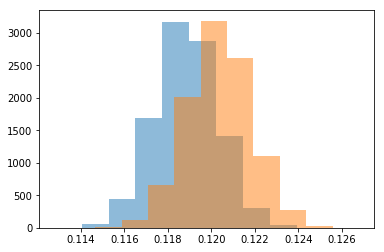

In [80]:
plt.hist(np.array(p_new),alpha=0.5)
plt.hist(np.array(p_old),alpha=0.5)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    4.,    36.,   254.,  1039.,  2174.,  2931.,  2267.,  1015.,
          230.,    50.]),
 array([-0.01012324, -0.00856874, -0.00701424, -0.00545974, -0.00390524,
        -0.00235074, -0.00079624,  0.00075826,  0.00231276,  0.00386726,
         0.00542176]),
 <a list of 10 Patch objects>)

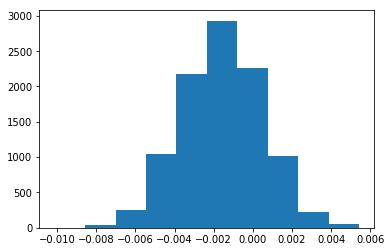

In [81]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)
#plt.axvline(diff,color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [82]:
null_values=np.random.normal(0,p_diffs.std(),10000)
#p_value for the first hypothesis H1: p_new>p_old
(null_values>diff).mean()

0.2283

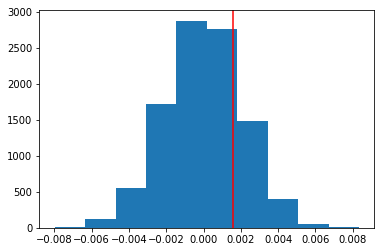

In [83]:
plt.hist(null_values)
plt.axvline(diff,color='r')


In [84]:
# for other hypothesis H0: p_new=p_old
bootsamp=sample.sample(100000,replace=True)
sample_mean=bootsamp.converted.mean()
null_mean=df2.converted.mean()
(null_values<sample_mean).mean()+(null_values>null_mean+(null_mean - sample_mean)).mean()

1.0

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
##### I computed the p_value for the hypothesis which means  is the probability of finding the observed, or more extreme, results when the null hypothesis (H0) of a study question is true.
#####  
##### the more p_value the less statistical difference between the two pages . for this case p_value  > 0.05 which lead me to fail in rejection the null hypothsis.[pold>=pnew]
##### for null hypothesis H0:p_new=p_old , the p_value is 1 which lead us to the statistic is in null values which lead us again to fail to reject null hypothesis.

## z-score test.

In [85]:
import statsmodels.api as sm
convert_old = df2.query('group=="control"').converted.sum()
convert_new = df2.query('group=="treatment"').converted.sum()
n_new = df2.query('group=="treatment"').user_id.nunique()
n_old = df2.query('group=="control"').user_id.nunique()

In [86]:
from statsmodels.stats.proportion import proportions_ztest
count =np.array([convert_new, convert_old])
nobs = np.array([n_new,n_old])
stat,pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
##### from this value i can say  the null hypthsis as p_value> 0.05  . and they also agree with the findings in j and k parts (also not the same value but the same meaning as p_value in both > 0.05 which lead us to fail to reject  null hypothesis)
##### A bigger p-value than the error ratio  means that there is stronger evidence in favor of the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
##### logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [87]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
df2['landing_page']=pd.get_dummies(df['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,0,1,1,0


In [99]:
df2.landing_page=df2.landing_page.astype(int)


In [100]:
print(df2['landing_page'].mean())
print(df2['converted'].mean())
print(df2.groupby(['group','ab_page'])['converted'].mean())

0.500061944223
0.119597087245
group      ab_page
control    0          0.120386
treatment  1          0.118808
Name: converted, dtype: float64


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [102]:
import statsmodels.api as sm

log_mod= sm.OLS(df2['converted'],df2[['intercept', 'ab_page']])
results=log_mod.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Fri, 19 Feb 2021   Prob (F-statistic):              0.190
Time:                        02:12:54   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in 
**Part II**?
##### p-value is zero as the converted column didnot depend on ab_page . 

<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
#### [H0] p_new - p_old =0
#### [H1] p_new - p_old !=0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
#####  for sure it is a good idea to add more additional terms into the regresion model like the age of the users , using time and time spending and more, to get more truthful result which we can use  to determine if we will launch the new page or not.
##### about the disadvantages i think there would be if we added additional terms as the results may be confused to understand or get the wrong description.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

##### from this results The conversion ratios for countries [US 70%, UK 25% ,CA 4.5%],so there is an impact of counrty .


In [107]:
data=pd.read_csv('countries.csv')
df_2=df2.join(data.set_index('user_id'),on='user_id')
df_2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,0,US


In [108]:
df_2.groupby('country')['converted'].sum()
# from this results The conversion ratios for countries 
#[US 70%, UK 25% ,CA 4.5%]

country
CA     1672
UK     8739
US    24342
Name: converted, dtype: int64

In [109]:
df_3=df_2.copy()
_dummies = pd.get_dummies(df_3['country'])
df_3 = df_3.join(_dummies)
df_3.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,0,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

##### from the below results i can see the p_value is equal 1 which lead us to cannot reject the null hypothesis and the statistic value definatly in null values.

In [110]:
lm3 = sm.OLS(df_3['landing_page'],df_3[['intercept','ab_page','CA','UK','US']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           landing_page   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.878e+33
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:27:13   Log-Likelihood:             9.3580e+06
No. Observations:              290584   AIC:                        -1.872e+07
Df Residuals:                  290580   BIC:                        -1.872e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.457e-15   6.81e-18   -360.926      0.000   -2.47e-15   -2.44e-15
ab_page        1.0000   9.27e-18   1.08e+17      0.000       1.000       1.000
CA         -5.364e-16   1.58e-17    -33.861      0.000   -5.67e-16   -5.05e-16
UK         -3.061e-16   8.87e-18    -34.527      0.000   -3.23e-16   -2.89e-16
US         -1.299e-15   7.13e-18   -182.054      0.000   -1.31e-15   -1.28e-15
==============================================================================
Omnibus:                  1227698.365   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35710.517
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                       1.285   Cond. No.                     1.36e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])